In [1]:
# import libraries 

import pandas as pd 
import numpy as np
import re 
from tqdm import tqdm  # controlar el tiempo en un loop
import os


# linear model library

import statsmodels.api as sm  # linear regression utiliza todas las columnas de base de datos 
import statsmodels.formula.api as smf  # linear regression usa uan formula
from sklearn import datasets, linear_model # models 
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.iv import IV2SLS # for IV regression

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

from pandas import Series, DataFrame
import matplotlib.pyplot as plt 

import geopandas as gpd  # manejo de datos georefereciados
from geopandas import GeoSeries # series de datos georerenciados
from shapely.geometry import Point, LineString, Polygon, MultiLineString # objetos geométricos
from shapely.ops import nearest_points  # operaciones entre objetods geometricos
import contextily as cx  # Fondo Goole maps, fondo de mapa 
from pyproj import CRS, Geod # proyecciones a sistemas planares


import matplotlib.patches as mpatches
import haversine as hs # distancia de grat-cricle entre puntos
from  geopy import distance # distancia entre puntos 
from tqdm import tqdm # contador de tiempo en un loop
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages

# Export latex table 

from pystout import pystout

user = os.getlogin()   # Username
os.chdir(f"C:/Users/{user}/Documents/GitHub/1ECO35_2022_2/Trabajo_final/datos") # Set directorio

In [2]:
#Instalamos librerias que no tenemos 
#!pip install pystout

In [3]:
#Pregunta 1.1. Estadísticas de varaibles de interés
#Establecemos la base de datos que usaremos 
repdata = pd.read_stata(r"../datos/mss_repdata.dta",
                           convert_categoricals=False)
repdata

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540.0,1981-01-01,Angola,AGO,839.215759,911.847290,1021.776855,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540.0,1982-01-01,Angola,AGO,969.864563,839.215759,911.847290,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540.0,1983-01-01,Angola,AGO,936.421631,969.864563,839.215759,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540.0,1984-01-01,Angola,AGO,992.536255,936.421631,969.864563,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540.0,1985-01-01,Angola,AGO,974.396118,992.536255,936.421631,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552.0,1995-01-01,Zimbabwe,ZWE,493.448456,465.000092,680.722412,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552.0,1996-01-01,Zimbabwe,ZWE,746.904236,493.448456,465.000092,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552.0,1997-01-01,Zimbabwe,ZWE,780.051941,746.904236,493.448456,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552.0,1998-01-01,Zimbabwe,ZWE,638.486389,780.051941,746.904236,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


In [4]:
#Nos quedamos con las variables de interés
table1 = repdata.loc[:,["NDVI_g", "tot_100",
               "trade_pGDP", "pop_den_rur",
               "land_crop", "va_agr", "va_ind_manf"]]

table1 

,NDVI_g,tot_100,trade_pGDP,pop_den_rur,land_crop,va_agr,va_ind_manf
0,NaN,NaN,NaN,197.384522,0.401059,NaN,NaN
1,NaN,NaN,NaN,202.516861,0.401059,NaN,NaN
2,-0.032181,NaN,NaN,207.917908,0.401059,NaN,NaN
3,0.011718,NaN,NaN,213.458649,0.401059,NaN,NaN
4,0.043623,127.930000,61.056736,218.983582,0.401059,13.548707,9.695752
...,...,...,...,...,...,...,...
738,-0.022146,100.000000,79.156792,254.089279,0.336048,15.235192,21.795248
739,0.192235,100.100000,72.069618,249.467636,0.336048,21.771107,18.780670
740,0.048942,109.650000,82.205071,244.998810,0.336048,18.934082,18.007488
741,-0.067663,108.990000,93.679726,249.493622,0.336048,21.788530,16.627857


In [5]:
#Generamos las estadísticas descriptivas basicas
summary_table = table1.describe().loc[["count","mean","std"]]
summary_table

,NDVI_g,tot_100,trade_pGDP,pop_den_rur,land_crop,va_agr,va_ind_manf
count,646.000000,668.000000,698.000000,720.000000,701.000000,702.000000,669.000000
mean,0.009282,109.877568,64.252421,324.816053,1.979464,32.181401,11.117373
std,0.093208,34.684560,34.291007,193.093648,3.373026,15.166560,6.262198


In [6]:
#Generamos la transpuesta para que se asemeje a la tabla real
summary_table = table1.describe().loc[["count","mean","std"]].T
summary_table

,count,mean,std
NDVI_g,646.0,0.009282,0.093208
tot_100,668.0,109.877568,34.684560
trade_pGDP,698.0,64.252421,34.291007
pop_den_rur,720.0,324.816053,193.093648
land_crop,701.0,1.979464,3.373026
va_agr,702.0,32.181401,15.166560
va_ind_manf,669.0,11.117373,6.262198


In [7]:
#Cambiamos los nombres de las variables de interés
table1.columns

new_names = ["Tasa de var. del indice de vegetacion",
                "Terminos de intercambio",
                "Exportaciones respecto al PBI",
                "Densidad poblacional rural",
                "Porcentaje de tierra cultivable en uso",
                "V. A. del sector agriculta respecto PBI",
                "V. A. del sector manufacturero respecto PBI"]

dict( zip( table1.columns, new_names) )

{'NDVI_g': 'Tasa de var. del indice de vegetacion',
 'tot_100': 'Terminos de intercambio',
 'trade_pGDP': 'Exportaciones respecto al PBI',
 'pop_den_rur': 'Densidad poblacional rural',
 'land_crop': 'Porcentaje de tierra cultivable en uso',
 'va_agr': 'V. A. del sector agriculta respecto PBI',
 'va_ind_manf': 'V. A. del sector manufacturero respecto PBI'}

In [8]:
# Cambiamos los nombres de las estadísticas a su versión en español
# Customize summary table 

index_nuevos_nombres = dict( zip( table1.columns, new_names) )

columns_nuevos_nombres = {
    "count": "Observaciones",
    "mean": "Media",
    "std": "Desviación estándar",
    
}

# Rename rows (indexes) and columns
summary_table.rename(index=index_nuevos_nombres, columns=columns_nuevos_nombres, inplace=True)


In [9]:
#Nos quedamos con la tabla final del inciso 1
summary_table

,Observaciones,Media,Desviación estándar
Tasa de var. del indice de vegetacion,646.0,0.009282,0.093208
Terminos de intercambio,668.0,109.877568,34.684560
Exportaciones respecto al PBI,698.0,64.252421,34.291007
Densidad poblacional rural,720.0,324.816053,193.093648
Porcentaje de tierra cultivable en uso,701.0,1.979464,3.373026
V. A. del sector agriculta respecto PBI,702.0,32.181401,15.166560
V. A. del sector manufacturero respecto PBI,669.0,11.117373,6.262198


In [10]:
# Exportamos el DataFrame a LaTeX como tabla. El codigo para modificar decimales no corrió por un motivo desconocido. 
summary_table.to_latex(
    "summary2.tex",
caption="Descriptive Statistics",
    column_format = "lccc"   # l: left, c:center , 
) 

In [11]:
#Pregunta 1.2. Réplica de la tabla  3 (pag 737)

In [12]:
#Modelo básico
y = repdata['any_prio']

# add constant

X = sm.add_constant(repdata.loc[:,["GPCP_g", "GPCP_g_l"]])
X

,const,GPCP_g,GPCP_g_l
0,1.0,-0.079653,-0.107587
1,1.0,0.155680,-0.079653
2,1.0,-0.034482,0.155680
3,1.0,0.059925,-0.034482
4,1.0,-0.018277,0.059925
...,...,...,...
738,1.0,0.061179,-0.316902
739,1.0,0.513642,0.061179
740,1.0,0.044380,0.513642
741,1.0,-0.181482,0.044380


In [13]:
# sm function

ols_model1 = sm.OLS(y, X).fit()

# fit() permite correr la

print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:               any_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.008
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.366
Time:                        19:47:42   Log-Likelihood:                -448.04
No. Observations:                 743   AIC:                             902.1
Df Residuals:                     740   BIC:                             915.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2697      0.016     16.449      0.0

In [14]:
# Robust standar error

ols_model1_rb = sm.OLS(y, X).fit(cov_type = "HC1")
print(ols_model1_rb.summary())

                            OLS Regression Results                            
Dep. Variable:               any_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.014
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.363
Time:                        19:47:43   Log-Likelihood:                -448.04
No. Observations:                 743   AIC:                             902.1
Df Residuals:                     740   BIC:                             915.9
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2697      0.016     16.374      0.0

In [15]:

#alternative robust standar error
ols_model1_rb1 = sm.OLS(y, X).fit(cov_type = "HC1") # Huber-White robust se

print(ols_model1_rb1.summary())

                            OLS Regression Results                            
Dep. Variable:               any_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.014
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.363
Time:                        19:47:44   Log-Likelihood:                -448.04
No. Observations:                 743   AIC:                             902.1
Df Residuals:                     740   BIC:                             915.9
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2697      0.016     16.374      0.0

In [16]:

# Acceder a la información de la tabla

ols_model1_rb.summary2()

ols_model1_rb.summary2().tables[1]


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.269715,0.016473,16.373626,2.950944e-60,0.237430,0.302001
GPCP_g,-0.028825,0.089833,-0.320878,7.483026e-01,-0.204894,0.147244
GPCP_g_l,-0.120448,0.086574,-1.391273,1.641426e-01,-0.290129,0.049234


In [17]:

dir(sm.OLS(y, X))

# Lista de atributos y métodos 


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_data_attr',
 '_df_model',
 '_df_resid',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'k_constant',
 'loglike',
 'nobs',
 'predict',
 'rank',
 'score',
 'weights',
 'wendog',
 'wexog',
 'whiten']

In [18]:

# Y estimados a partir del método predict 

sm.OLS(y, X).fit().predict()


array([0.28496978, 0.2748217 , 0.25195793, 0.27214113, 0.26302426,
       0.26568972, 0.2466797 , 0.27791809, 0.25526007, 0.28224195,
       0.26917588, 0.30081865, 0.28540232, 0.21866934, 0.2861791 ,
       0.27253843, 0.27999266, 0.27934855, 0.26917232, 0.28043463,
       0.27237109, 0.26828123, 0.27929381, 0.25381756, 0.26769429,
       0.27252959, 0.27744108, 0.24540483, 0.2622242 , 0.28374367,
       0.22578955, 0.28753694, 0.26812988, 0.25210689, 0.2885355 ,
       0.26993623, 0.26967236, 0.25559903, 0.24386254, 0.2739153 ,
       0.30170927, 0.26866805, 0.28991521, 0.24865613, 0.26155857,
       0.27105444, 0.17496034, 0.29626138, 0.29942372, 0.23988976,
       0.30644488, 0.18201347, 0.27697215, 0.25379256, 0.24793872,
       0.26968144, 0.29971203, 0.27894354, 0.27432929, 0.27281134,
       0.28310697, 0.25005254, 0.24888163, 0.27129552, 0.27677362,
       0.2524269 , 0.27155199, 0.28413026, 0.2312682 , 0.28199823,
       0.27089332, 0.2498764 , 0.28802241, 0.26710212, 0.26587

In [19]:

# Recordad métodos y atributos 

print(dir(ols_model1))

# predict para ello uso la función predict 

ols_model1.predict(X)

# acceso a los parámetros

ols_model1.params

# R2 y R2  ajustado

ols_model1.rsquared
ols_model1.rsquared_adj

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_mo

2.0778261906828632e-05

In [20]:

control_formula = "any_prio"+ " ~ "+ "GPCP_g + " + "GPCP_g_l"

ols_model1 = smf.ols(control_formula, data=repdata).fit()

print(ols_model1.summary())


                            OLS Regression Results                            
Dep. Variable:               any_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.008
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.366
Time:                        19:47:51   Log-Likelihood:                -448.04
No. Observations:                 743   AIC:                             902.1
Df Residuals:                     740   BIC:                             915.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2697      0.016     16.449      0.0

In [21]:

ols_model1_skl = linear_model.LinearRegression().fit( X, y )

ols_model1_skl.coef_ # acceso a coeficientes 

ols_model1_skl.predict(X) # predict en formato array 
ols_model1_skl.score(X,y) # R cuadrado
dir(ols_model1_skl)
mean_squared_error( y, ols_model1.predict())**0.5 # root mean square error 

0.4422283305322858

In [22]:

# country fixed effect

index_columns = np.where( repdata.columns.str.contains(
    '_time$'))[0]
# indice con nombre de variables que terminan con _time

country_trend = repdata.columns[index_columns] # se extrae el nombre de todas las variables que terminan con _time


In [23]:
# In[88]:


formula_model1 = "any_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model1 = smf.ols(formula_model1, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['ccode']})

print(ols_model1.summary())

rmse_ol1 = round(mean_squared_error( y, ols_model1.predict())**0.5,2)

print(rmse_ol1)

PatsyError: expected a noun, but instead the expression ended
    any_prio ~ GPCP_g + GPCP_g_l + C(ccode) +
                                            ^

In [50]:
#Modelo 2
y = repdata['war_prio']

# add constant

X = sm.add_constant(repdata.loc[:,["GPCP_g", "GPCP_g_l"]])

# sm function

ols_model2 = sm.OLS(y, X).fit()

# fit() permite correr la regresión

print(ols_model2.summary())

# Robust standar error

ols_model2_rb = sm.OLS(y, X).fit(cov_type = "HC1")
print(ols_model2_rb.summary())


                            OLS Regression Results                            
Dep. Variable:               war_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.200
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.302
Time:                        19:44:08   Log-Likelihood:                -320.10
No. Observations:                 743   AIC:                             646.2
Df Residuals:                     740   BIC:                             660.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1697      0.014     12.292      0.0

In [51]:
#alternative robust standar error
ols_model_rb2 = sm.OLS(y, X).fit(cov_type = "HC1") # Huber-White robust se

print(ols_model_rb2.summary())

                            OLS Regression Results                            
Dep. Variable:               war_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.507
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.222
Time:                        19:44:13   Log-Likelihood:                -320.10
No. Observations:                 743   AIC:                             646.2
Df Residuals:                     740   BIC:                             660.0
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1697      0.014     12.142      0.0

In [52]:
# Acceder a la información de la tabla

ols_model_rb2.summary2()

ols_model_rb2.summary2().tables[1]


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.169673,0.013974,12.142308,6.302264e-34,0.142285,0.197061
GPCP_g,-0.097672,0.066248,-1.474323,1.403946e-01,-0.227516,0.032173
GPCP_g_l,-0.089139,0.063113,-1.412375,1.578396e-01,-0.212839,0.034560


In [53]:

dir(sm.OLS(y, X))

# Lista de atributos y métodos 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_data_attr',
 '_df_model',
 '_df_resid',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'k_constant',
 'loglike',
 'nobs',
 'predict',
 'rank',
 'score',
 'weights',
 'wendog',
 'wexog',
 'whiten']

In [54]:

# Y estimados a partir del método predict 

sm.OLS(y, X).fit().predict()

array([0.18704291, 0.16156761, 0.1591636 , 0.16689364, 0.16611632,
       0.15020309, 0.16052623, 0.16445212, 0.1678748 , 0.17493067,
       0.18461317, 0.21096717, 0.14646171, 0.14220873, 0.18236471,
       0.17711868, 0.18211489, 0.18210699, 0.14566715, 0.17998848,
       0.16871667, 0.17702256, 0.16698367, 0.15666318, 0.1680248 ,
       0.17984615, 0.16204504, 0.1430644 , 0.1802974 , 0.14964679,
       0.14789666, 0.18521695, 0.15446167, 0.16866698, 0.18319467,
       0.17212033, 0.15998443, 0.16219266, 0.14809908, 0.19410448,
       0.18898141, 0.18438161, 0.1734193 , 0.14512834, 0.17947203,
       0.1080412 , 0.11027748, 0.21478754, 0.16391527, 0.1845413 ,
       0.13976727, 0.11104919, 0.16801464, 0.14509102, 0.14936252,
       0.18708431, 0.19845518, 0.17957136, 0.17248373, 0.18268706,
       0.1702437 , 0.14207546, 0.15359244, 0.1777945 , 0.16454007,
       0.15436827, 0.186385  , 0.15436469, 0.14794209, 0.18320195,
       0.15511713, 0.166916  , 0.18187508, 0.16644452, 0.16207

In [55]:

# Recordad métodos y atributos 

print(dir(ols_model2))

# predict para ello uso la función predict 

ols_model2.predict(X)

# acceso a los parámetros

ols_model2.params

# R2 y R2  ajustado

ols_model2.rsquared
ols_model2.rsquared_adj


['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_mo

0.0005381642535065012

In [57]:

control_formula = "war_prio"+ " ~ "+ "GPCP_g + " + "GPCP_g_l"

ols_model2 = smf.ols(control_formula, data=repdata).fit()

print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               war_prio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.200
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.302
Time:                        19:44:32   Log-Likelihood:                -320.10
No. Observations:                 743   AIC:                             646.2
Df Residuals:                     740   BIC:                             660.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1697      0.014     12.292      0.0

In [58]:

ols_model2_skl = linear_model.LinearRegression().fit( X, y )

ols_model2_skl.coef_ # acceso a coeficientes 

ols_model2_skl.predict(X) # predict en formato array 
ols_model2_skl.score(X,y) # R cuadrado
dir(ols_model2_skl)
mean_squared_error( y, ols_model2.predict())**0.5 # root mean square error 


0.37227542395527624

In [60]:

formula_model2 = "war_prio ~ GPCP_g + GPCP_g_l + C(ccode)" + ' + ' + ' + '.join( country_trend )

ols_model2 = smf.ols(formula_model2, data=repdata).fit(cov_type='cluster', cov_kwds={'groups': repdata['ccode']})

print(ols_model2.summary())

rmse_ol2 = round(mean_squared_error( y, ols_model2.predict())**0.5,2)

print(rmse_ol2)

PatsyError: expected a noun, but instead the expression ended
    war_prio ~ GPCP_g + GPCP_g_l + C(ccode) +
                                            ^

In [61]:

# Lista de explicativa a mostrarse en la tabla

explicativas = ['GPCP_g','GPCP_g_l']

# etiquetas a las variables 

etiquetas = ['Growth in rainfall, t','Growth in rainfall, t-1']


labels = dict(zip(explicativas,etiquetas))
labels


{'GPCP_g': 'Growth in rainfall, t', 'GPCP_g_l': 'Growth in rainfall, t-1'}

In [62]:

pystout(models = [ols_model1,ols_model2], file='regression_table.tex', digits=3,
        endog_names=['Civil Conflict 25 Deaths (OLS)','Civil Conflict 1,000 Deaths'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        mgroups={'Ordinary Least Squares':[1,5]}, # titulo a las regresiones
        modstat={'nobs':'Observarions','rsquared':'R\sym{2}'}, # estadísticos 
        addrows={'Country fixed effects':['yes','yes'], 'Country-specific time trends' :
                 ['yes','yes'],
                 'Root mean square error': [rmse_ol1,rmse_ol2]}, # añadimos filas 
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                  'Regression disturbance terms are clustered at the country level.',
                 'A country-specific year time trend is included in all specifications (coefficient estimates not reported).',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '* Significantly different from zero at 99 percent confidence.'],
        title='Rainfall and Economic Growth',
        stars={.1:'',.05:'',.01:'**'}
       )


NameError: name 'rmse_ol1' is not defined

In [ ]:
pip install statsmodelsr es

In [24]:
#Pregunta3. Geopandas para la Mita

In [25]:
#Establecemos las coordenadas del Norte
prueba1 = gpd.read_file(r"C:\Users\Usuario\Documents\GitHub\1ECO35_2022_2\Trabajo_final\datos\Mita\huan_line.shp")
prueba1

,FID_huan_p,Id,geometry
0,0,0,"LINESTRING (119182.728 -1644604.598, 119229.77..."
1,0,0,"LINESTRING (-361895.958 -1145031.510, -361721...."
2,0,0,"LINESTRING (725202.266 -1946904.115, 728119.88..."
3,0,0,"LINESTRING (722017.727 -1941288.292, 719100.45..."
4,0,0,"LINESTRING (35361.149 -1533373.587, 35506.927 ..."


<AxesSubplot: >

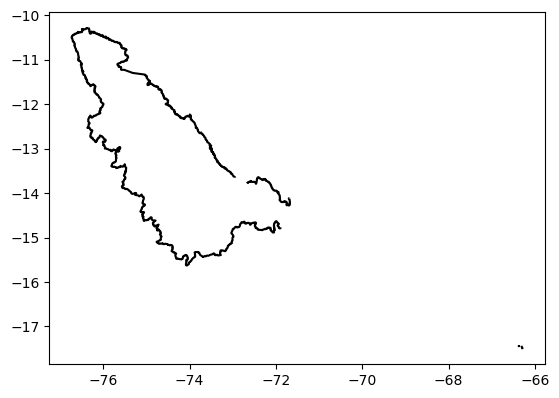

In [26]:
#Gnereamos gráfico del Norte
prueba1.to_crs(epsg=4326,inplace=True)
prueba1.plot(color="black")

In [27]:
#Establecemos las coordenadas del centro
prueba2 = gpd.read_file(r"C:\Users\Usuario\Documents\GitHub\1ECO35_2022_2\Trabajo_final\datos\Mita\MitaBoundary.shp")
prueba2

,FID_in2_po,Id,geometry
0,0,0,"LINESTRING (688884.250 8510730.000, 689044.875..."
1,0,0,"LINESTRING (945641.513 8232696.975, 945635.375..."


<AxesSubplot: >

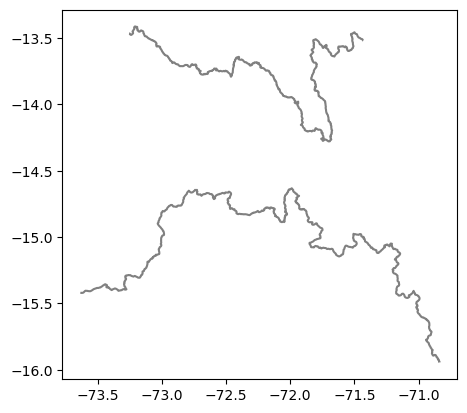

In [28]:
#Gnereamos gráfico del centro 
prueba2.to_crs(epsg=4326,inplace=True)
prueba2.plot(color="gray")

In [29]:
#Establecemos las coordenadas del Sur
prueba3 = gpd.read_file(r"C:\Users\Usuario\Documents\GitHub\1ECO35_2022_2\Trabajo_final\datos\Mita\pot_line.shp")
prueba3

,FID_mita_t,Id,geometry
0,0,0,"LINESTRING (733527.578 -1942420.482, 733064.07..."
1,0,0,"LINESTRING (208634.518 -1492827.617, 209008.33..."
2,0,0,"LINESTRING (143277.110 -1571620.400, 143146.84..."
3,0,0,"LINESTRING (522800.625 -1793793.572, 558158.61..."


<AxesSubplot: >

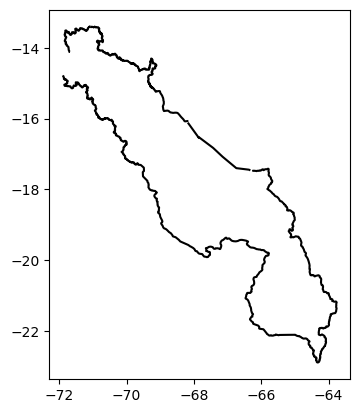

In [30]:
#Gnereamos gráfico del Sur
prueba3.to_crs(epsg=4326,inplace=True)
prueba3.plot(color="black")

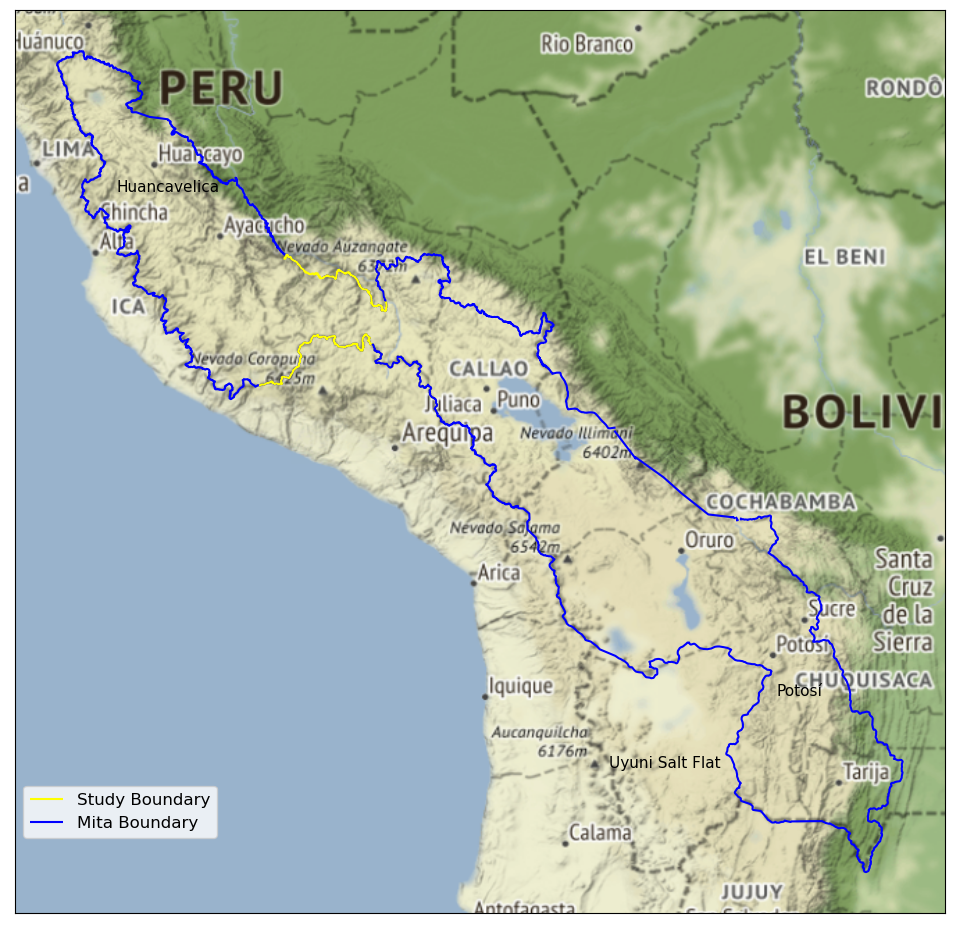

In [32]:
#Planteamos las dimensiones del gráfico 
f, ax = plt.subplots(figsize=(12,12)) 

prueba1['geometry'].plot(color='blue', edgecolor='black', zorder=0.5, ax = ax) 
#Introducimos la primera línea en nuestro mapa de color negro  
prueba2['geometry'].plot(color = 'yellow', edgecolor='gold', zorder=0.5, ax = ax, label="Study Boundary")    
#Introducimos la segunda línea en nuestro mapa de color gris con borde blanco y le añadimos la etiqueta "Study Boundary"
prueba3['geometry'].plot(color = 'blue', edgecolor='black', zorder=0.5, ax = ax, label="Mita Boundary")
#Introducimos la tercera línea en nuestro mapa de color negro y le añadimos la etiqueta "Mita Boundary". 
#Solo ponemos esta e intepretaremos el color como indicador de prueba 1 y prueba 3 

# Borramos los valores de los ejes

plt.xticks([])
plt.yticks([])

#Añadimos los nombres siguiendo las cooredenadas encontradas con prueba y error. 

# Añadimos Huancavelica 
f.text(0.21,0.72,'Huancavelica',color = 'black', size = 11,
        bbox=dict(facecolor='none', edgecolor='none', pad=6.0)) 

# Añadimos Potosí 
f.text(0.76,0.30,'Potosí',color = 'black', size = 11,
        bbox=dict(facecolor='none', edgecolor='none', pad=6.0)) 

# Añadimos Uyuni Salt Flat
f.text(0.62,0.24,'Uyuni Salt Flat',color = 'black', size = 11,
        bbox=dict(facecolor='none', edgecolor='none', pad=6.0)) 

# Añadimos un mapa de fondo que no se parece mucho al original. Pero, de cualquier forma, nos sirve para darle algo de color
# al trabajo. El original se creó con altitudos y por este motivo no podemos generarlo. 

cx.add_basemap(ax, crs="EPSG:4326", attribution = False)


# Finalmente, agregamos la leyenda que considera las etiquetas previamente puestas en el perimetro de la mita y de estudio.

plt.legend(loc='upper left',
           title = "",frameon=True,
            bbox_to_anchor=(0, 0.15), prop={'size': 12})
plt.savefig("mapa2.png")